# Import Packages

In [6]:
!pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached soundfile-0.11.0-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached audioread-3.0.0-py3-none-any.whl


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import random
import glob
import IPython.display as ipd
import pickle

import numpy as np
from scipy import signal
from scipy.fftpack import fft
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
import librosa
# import librosa.display

%matplotlib inline

ImportError: Numba needs NumPy 1.20 or less

# EDA

In [2]:
data_dir = "../data"

In [8]:
def load_audio_file(file_path):
    input_length = 16000
    out = librosa.core.load(file_path)
    print(out)
    data = out[0]
    if len(data) > input_length:
        data = data[:input_length] ## Only takes input length
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant") ## Pad to input length
    return data

def plot_time_series(data):
    print("Size = ", len(data))
    fig = plt.figure()
    plt.plot(np.linspace(0,1,len(data)), data)

In [9]:
sample_file = os.listdir(os.path.join(data_dir, "train", "audio", "four"))
sample_idx = random.choice(range(len(sample_file)))
sample_path = os.path.join(data_dir, "train", "audio", "four", sample_file[sample_idx])
print("Sample path:", sample_path)

Sample path: ../data/train/audio/four/f953e1af_nohash_3.wav


(array([-3.220602e-05,  4.651669e-06,  6.751501e-05, ..., -2.313396e-03,
       -2.998342e-04,  5.639523e-04], dtype=float32), 22050)
16000
Size =  16000


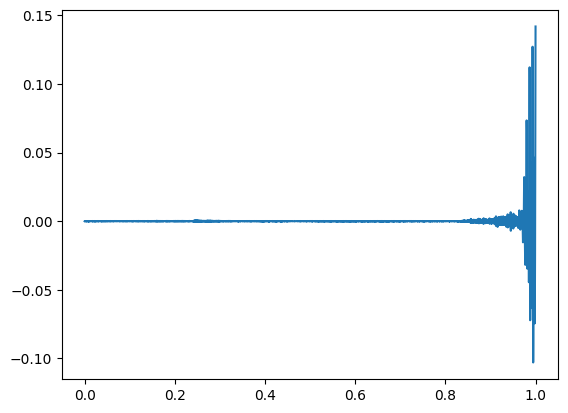

In [10]:
data = load_audio_file(sample_path)
print(len(data))
plot_time_series(data)

In [11]:
sample_data, sr = wavfile.read(sample_path)
print(sample_data, sr)
sample_data, sr = librosa.load(sample_path)
print(sample_data, sr)
sample_data, sr = librosa.load(sample_path, sr = None)
print(sample_data, sr)

16000 [  -1    1    2 ... -115  -62   17]
[-3.220602e-05  4.651669e-06  6.751501e-05 ... -2.313396e-03 -2.998342e-04
  5.639523e-04] 22050
[-3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -3.5095215e-03
 -1.8920898e-03  5.1879883e-04] 16000


In [12]:
SAMPLE_RATE = 16000
FFT_WINDOW = 320
FFT_OVERLAP = 160

def spectrogram_plot(data, sample_rate):

    window_size = 20
    step_size = 10
    eps = 1e-10

    freqs, times, spec = signal.spectrogram(data, fs=sample_rate, window='hann',
                                            nperseg=FFT_WINDOW, noverlap=FFT_OVERLAP, detrend=False)
    
    spec = np.log(spec.T.astype(np.float32) + eps)
    plt.imshow(spec, aspect='auto', origin='lower', 
            extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    
    print("Feature Size:",spec.shape)
    print(f"Max log amplitude: {spec.max()}. Min log amplitude: {spec.min()}")
    
    return freqs, times, spec

Feature Size: (99, 161)
Max log amplitude: -10.3353853225708. Min log amplitude: -23.025850296020508


(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
        3150., 3200., 3250., 3300., 3350., 3400., 3450., 3500., 3550.,
        3600., 3650., 3700., 3750., 3800., 3850., 3900., 3950., 4000.,
        4050., 4100., 4150., 4200., 4250., 4300., 4350., 4400., 4450.,
        4500., 4550., 4600., 4650., 4700., 4750., 4800., 4850., 4900.,
        4950., 5000., 5050., 5100., 5150., 5200., 5250., 5300., 5350.,
        5400., 5450., 5500., 5550., 5600., 5650., 5700., 5750., 5800.,
        5850., 5900., 5950., 6000., 6050., 6100., 6150., 6200., 6250.,
      

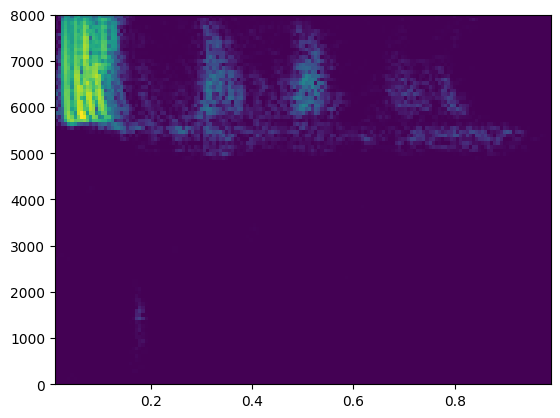

In [13]:
sample_data, sr = librosa.load(sample_path, sr = 16000)
spectrogram_plot(sample_data, sr)

In [14]:
sample_data, sr = librosa.load(sample_path, sr = 16000)
print(len(sample_data))
X = librosa.stft(sample_data.astype('float'), n_fft=512, hop_length = 128)
Xdb = librosa.amplitude_to_db(X)
print(Xdb.shape, sr)
print(Xdb.max(), Xdb.min())
plt.figure(figsize=(6, 6))
librosa.display.specshow(Xdb.T, sr=sr, x_axis='time', y_axis='hz')
plt.show()

16000
(257, 126) 16000
18.931835373522656 -61.06816462647734


/mnt/c/Users/QUAN/Desktop/speech_recognition/venv/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


AttributeError: module 'librosa' has no attribute 'display'

<Figure size 600x600 with 0 Axes>

In [15]:
sample_data.shape

(16000,)

In [16]:
SAMPLE_RATE = 16000 
FFT_WINDOW = 512 
FFT_OVERLAP = 128 
MEL_CHANNELS = 128 

def mfcc(sample_data):
    S = librosa.feature.melspectrogram(y = sample_data, sr=SAMPLE_RATE, n_fft = FFT_WINDOW,
                                    hop_length = FFT_OVERLAP, n_mels=MEL_CHANNELS)
    print(S.shape, S.max(), S.min())
    log_S = librosa.power_to_db(S, ref=np.max)
    print(log_S.shape, log_S.max(), log_S.min())
    librosa.display.specshow(log_S.T, x_axis = "time", fmax=16000,
                            y_axis="mel", sr=16000,)
    return log_S.T

In [17]:
sample_mfcc = mfcc(sample_data)
sample_mfcc.shape

(128, 126) 2.1433465 1.6665564e-13
(128, 126) 0.0 -80.0


AttributeError: module 'librosa' has no attribute 'display'

In [18]:
step = 4
sample_data_ps = librosa.effects.pitch_shift(sample_data, sr = SAMPLE_RATE, n_steps = step)
len(sample_data_ps)

16000

In [19]:
#bed_list = os.listdir(os.path.join(DATA_PATH, "train", "audio", "bed"))
bed_list = glob.glob(os.path.join(DATA_PATH, "train", "audio", "bed", "*.wav"))
four_list = glob.glob(os.path.join(DATA_PATH, "train", "audio", "four", "*.wav"))
for _ in range(10):
    plt.figure(figsize = (24, 6))
    sample_idx = random.randint(0, len(bed_list)-1)
    sample = wavfile.read(bed_list[sample_idx])
    sample_rate, data = sample
    plt.subplot(1,4,1)
    plt.plot(data)
    plt.subplot(1,4,2)
    spectrogram_plot(data, sample_rate)
    
    sample_idx = random.randint(0, len(four_list)-1)
    sample = wavfile.read(four_list[sample_idx])
    sample_rate, data = sample
    plt.subplot(1,4,3)
    plt.plot(data)

    plt.subplot(1,4,4)
    spectrogram_plot(data, sample_rate)
    plt.show()

NameError: name 'DATA_PATH' is not defined

In [20]:
speed_change = np.random.uniform(low=1,high=1.1)
print("speed_change = ",speed_change)
print("Sample Size:", len(sample_data))
tmp = librosa.effects.time_stretch(sample_data, speed_change)
print(len(tmp))
minlen = min(sample_data.shape[0], tmp.shape[0])
sample_data_speed = 0 * sample_data 
sample_data_speed[0:minlen] = tmp[0:minlen]
len(sample_data_speed)

speed_change =  1.0200549513348645
Sample Size: 16000
15685


/tmp/ipykernel_16594/3910381909.py:4: FutureWarning: Pass rate=1.0200549513348645 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tmp = librosa.effects.time_stretch(sample_data, speed_change)


16000

In [21]:
from pathlib import Path
datapath = Path("../") / "data"
with open(str(datapath/"train"/"validation_list.txt"), "r", encoding = "utf-8") as f:
    lines = f.readlines()
    val_file_list = [line.rstrip() for line in lines]
    print("No val files:",len(val_file_list))
    print(val_file_list[:5])

No val files: 6798
['bed/026290a7_nohash_0.wav', 'bed/060cd039_nohash_0.wav', 'bed/060cd039_nohash_1.wav', 'bed/099d52ad_nohash_0.wav', 'bed/0e17f595_nohash_0.wav']


In [22]:
val_classes = set()
for file in val_file_list:
    val_classes.add(file.split("/")[0])
print("No val classes:",len(val_classes))
    
with open(str(datapath/"train"/"testing_list.txt"), "r", encoding = "utf-8") as f:
    lines = f.readlines()
    test_file_list = [line.rstrip() for line in lines]
    print("No test files:",len(test_file_list))
    
test_classes = set()
for file in test_file_list:
    test_classes.add(file.split("/")[0])
print("No test classes:",len(test_classes))

print("Total number of val and test files: ", len(val_file_list) + len(test_file_list))
val_test_list = val_file_list + test_file_list

No val classes: 30
No test files: 6835
No test classes: 30
Total number of val and test files:  13633


In [23]:
audio_file_list = []
for audio_class in val_classes:
    audio_file_list += os.listdir((datapath/"train"/"audio"/audio_class))
    
print("Total number of .wav files:", len(audio_file_list))

Total number of .wav files: 64721


In [24]:
check_count = 0
val_test_list = [file.split("/")[1] for file in val_test_list]
for file_name in audio_file_list:
    if file_name in val_test_list:
        check_count += 1
print(check_count)

13633


## Prepare Data

### Validation Data

In [26]:
with open(os.path.join(data_dir, "train", "validation_list.txt"), "r") as f:
    val_paths = [file.rstrip() for file in f.readlines()]
    val_targets = [path.split("/")[0]  for path in val_paths]
    val_paths = [os.path.join(data_dir, "train", "audio", path) for path in val_paths]
    
    
with open(os.path.join(data_dir, "train", "testing_list.txt"), "r") as f:
    test_paths = [file.rstrip() for file in f.readlines()]
    test_targets = [path.split("/")[0]  for path in test_paths]
    test_paths = [os.path.join(data_dir, "train", "audio", path) for path in test_paths]
    
train_paths = []
train_targets = []

labels = ['silence','yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
          'bed', 'bird', 'cat', 'dog', 'eight', 'five', 'four', 'happy', 'house', 'marvin',
          'nine', 'one', 'seven', 'sheila', 'six', 'three', 'tree', 'two', 'wow', 'zero']

for label in labels[1:]:
    filelist = os.listdir(os.path.join(data_dir, "train", "audio", label))
    for file in filelist:
        filepath = label + "/" + file
        if filepath not in val_paths and filepath not in test_paths:
            train_paths.append(os.path.join(data_dir, "train", "audio", filepath))
            train_targets.append(label)
            
predict_paths = [os.path.join(data_dir, "test", "audio", path)
                 for path in os.listdir(os.path.join(data_dir, "test", "audio"))]

In [38]:
debug_idx = np.random.choice(len(train_paths), size=320, replace=False)
x_debug = []

debug_paths = [train_paths[idx] for idx in debug_idx]
debug_targets = [train_targets[idx] for idx in debug_idx]

In [45]:
x_debug[0].shape

(16000,)

In [46]:
sample_rate = 16000
for path in debug_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_debug.append(audio)
print(x_debug)
with open("./debug.pkl", "wb") as f:
    pickle.dump((x_debug, debug_targets), f)

[array([ 6.1035156e-05,  6.1035156e-05,  6.1035156e-05, ...,
       -3.0517578e-05,  0.0000000e+00, -1.2207031e-04], dtype=float32), array([ 0.0000000e+00, -6.1035156e-05, -3.0517578e-05, ...,
        1.8310547e-04,  3.0517578e-05, -3.0517578e-05], dtype=float32), array([0.00021362, 0.00048828, 0.00039673, ..., 0.00076294, 0.0005188 ,
       0.00048828], dtype=float32), array([-0.0005188 , -0.00119019, -0.00094604, ...,  0.00094604,
        0.00082397,  0.00109863], dtype=float32), array([-0.00076294, -0.00119019, -0.00146484, ...,  0.0005188 ,
        0.00064087,  0.00076294], dtype=float32), array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
       0.0000000e+00, 3.0517578e-05], dtype=float32), array([-3.0517578e-05, -6.1035156e-05, -3.0517578e-05, ...,
       -1.5258789e-04, -1.2207031e-04, -9.1552734e-05], dtype=float32), array([ 0.0000000e+00,  2.7465820e-04,  9.1552734e-05, ...,
        1.2207031e-04, -2.4414062e-04, -6.4086914e-04], dtype=float32), array([-0

In [19]:
sample_rate = 16000
x_val, x_test, x_train, x_predict = [],[],[],[]
   
for path in val_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_val.append(audio)
with open('./validation.pkl', 'wb') as f:
    pickle.dump((x_val, val_targets), f)

for path in test_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_test.append(audio)
with open('./test.pkl', 'wb') as f:
    pickle.dump((x_test, test_targets), f)

for path in train_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_train.append(audio)
with open("./train.pkl", "wb") as f:
    pickle.dump((x_train, train_targets), f)
    
for path in predict_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_predict.append(audio)
with open("./predict.pkl", "wb") as f:
    pickle.dump(x_predict, f)

: 

### Load Data

In [5]:
with open(os.path.join(data_dir, "pickle", "train.pkl"), "rb") as f:
    train_data = pickle.load(f)
with open(os.path.join(data_dir, "pickle", "validation.pkl"), "rb") as f:
    val_data = pickle.load(f)
with open(os.path.join(data_dir, "pickle", "test.pkl"), "rb") as f:
    test_data = pickle.load(f)
with open(os.path.join(data_dir, "pickle", "predict.pkl"), "rb") as f:
    predict_data = pickle.load(f)

## Silence Files

In [6]:
silence_paths = os.listdir(os.path.join(data_dir, "train", "audio",
                                        "_background_noise_"))
silence_files = [file for file in silence_paths if file.endswith(".wav")]

sample_rate = 16000
big_files = []

for file in silence_files:
    file_path = os.path.join(data_dir, "train", "audio", "_background_noise_", file)
    sample = librosa.load(file_path, sr = sample_rate)
    big_files.append(sample[0])

NameError: name 'librosa' is not defined

In [22]:
silence_files

['doing_the_dishes.wav',
 'dude_miaowing.wav',
 'exercise_bike.wav',
 'pink_noise.wav',
 'running_tap.wav',
 'white_noise.wav']

In [22]:
train_labels = np.unique(train_data[1], return_counts = True)
print("Train:",{train_labels[0][idx]:train_labels[1][idx] for idx in range(30)})
print(np.array(train_labels[1]).mean())
val_labels = np.unique(val_data[1], return_counts = True)
print("Train:",{val_labels[0][idx]:val_labels[1][idx] for idx in range(30)})
print(np.array(val_labels[1]).mean())
test_labels = np.unique(test_data[1], return_counts = True)
print("Train:",{test_labels[0][idx]:test_labels[1][idx] for idx in range(30)})
print(np.array(test_labels[1]).mean())

Train: {'bed': 1713, 'bird': 1731, 'cat': 1733, 'dog': 1746, 'down': 2359, 'eight': 2352, 'five': 2357, 'four': 2372, 'go': 2372, 'happy': 1742, 'house': 1750, 'left': 2353, 'marvin': 1746, 'nine': 2364, 'no': 2375, 'off': 2357, 'on': 2367, 'one': 2370, 'right': 2367, 'seven': 2377, 'sheila': 1734, 'six': 2369, 'stop': 2380, 'three': 2356, 'tree': 1733, 'two': 2373, 'up': 2375, 'wow': 1745, 'yes': 2377, 'zero': 2376}
2157.366666666667
Train: {'bed': 197, 'bird': 162, 'cat': 168, 'dog': 170, 'down': 264, 'eight': 243, 'five': 242, 'four': 280, 'go': 260, 'happy': 189, 'house': 173, 'left': 247, 'marvin': 160, 'nine': 230, 'no': 270, 'off': 256, 'on': 257, 'one': 230, 'right': 256, 'seven': 263, 'sheila': 176, 'six': 262, 'stop': 246, 'three': 248, 'tree': 166, 'two': 236, 'up': 260, 'wow': 166, 'yes': 261, 'zero': 260}
226.6
Train: {'bed': 176, 'bird': 158, 'cat': 166, 'dog': 180, 'down': 253, 'eight': 257, 'five': 271, 'four': 253, 'go': 251, 'happy': 180, 'house': 150, 'left': 267, 'm

In [24]:
import soundfile as sf

if not os.path.exists(os.path.join(data_dir,"train","audio","silence")):
    os.makedirs(os.path.join(data_dir,"train","audio","silence"))

silence_paths = os.listdir(os.path.join(data_dir, "train", "audio",
                                        "_background_noise_"))
silence_files = [file for file in silence_paths if file.endswith(".wav")]

sample_rate = 16000

silence_audio_files = []

for file in silence_files:
    file_path = os.path.join(data_dir, "train", "audio", "_background_noise_", file)
    big_audio, _ = librosa.load(file_path, sr = sample_rate)
    start_idx = list(range(0, len(big_audio) - 16000, 2250))
    for ind, start_idx in enumerate(start_idx):
        audio = big_audio[start_idx:(start_idx+16000)]
        silence_audio_files.append(audio)
        file_name = "frag%d" %ind + "_%s" %file
        sf.write(os.path.join(data_dir, "train", "audio", "silence", file_name), audio, 16000)


In [17]:
total_len = 0
required_files = 2300 + 250 + 250
for audio in big_files:
    total_len += audio.shape[0]
    
print(total_len/required_files)

2282.275357142857


In [53]:
silence_paths = os.listdir(os.path.join(data_dir, "train", "audio", "silence"))
np.random.shuffle(silence_paths)
sample_rate = 16000
silence_audios = []
for silence_file in silence_paths:
    file_path = os.path.join(data_dir, "train", "audio", "silence", silence_file)
    silence_audio, _ = librosa.load(file_path, sr = sample_rate)
    silence_audios.append(silence_audio)

In [57]:
train_images, train_labels = train_data[0], train_data[1]
train_silence_audio = silence_audios[:2300]
train_images.extend(train_silence_audio)
train_labels.extend(["silence"] * len(train_silence_audio))
print(len(train_images), len(train_labels))

val_images, val_labels = val_data[0], val_data[1]
val_silence_audio = silence_audios[2300:2550]
val_images.extend(val_silence_audio)
val_labels.extend(["silence"] * len(val_silence_audio))
print(len(val_images), len(train_labels))

test_images, test_labels = test_data[0], test_data[1]
test_silence_audio = silence_audios[2550:]
test_images.extend(test_silence_audio)
test_labels.extend(["silence"] * len(test_silence_audio))
print(len(test_images), len(test_labels))

64721 64721
67021 67021
6798 67021
7048 67021
6835 6835
7085 7085


In [58]:
with open('./validation.pkl', 'wb') as f:
    pickle.dump((train_images, train_labels), f)

with open('./test.pkl', 'wb') as f:
    pickle.dump((val_images, val_labels), f)

with open("./train.pkl", "wb") as f:
    pickle.dump((test_images, test_labels), f)

In [54]:
for path in val_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_val.append(audio)
with open('./validation.pkl', 'wb') as f:
    pickle.dump((x_val, val_targets), f)

for path in test_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_test.append(audio)
with open('./test.pkl', 'wb') as f:
    pickle.dump((x_test, test_targets), f)

for path in train_paths:
    audio, _ = librosa.load(path, sr = sample_rate)
    x_train.append(audio)
with open("./train.pkl", "wb") as f:
    pickle.dump((x_train, train_targets), f)

[array([0.02679443, 0.01553345, 0.01031494, ..., 0.01312256, 0.00473022,
        0.03460693], dtype=float32),
 array([-0.01586914, -0.01748657,  0.01150513, ...,  0.04232788,
         0.03222656,  0.01831055], dtype=float32),
 array([ 0.04458618,  0.00656128, -0.06854248, ...,  0.03683472,
        -0.09194946, -0.05541992], dtype=float32),
 array([-0.00253296,  0.0302124 , -0.02624512, ..., -0.01766968,
        -0.00384521,  0.03668213], dtype=float32),
 array([ 0.03289795,  0.00802612, -0.0032959 , ...,  0.01501465,
         0.03540039,  0.02301025], dtype=float32),
 array([ 1.3031006e-02, -9.1552734e-05,  2.7465820e-02, ...,
        -5.4931641e-04, -1.0070801e-02,  2.1362305e-03], dtype=float32),
 array([-0.00210571,  0.17718506,  0.29458618, ..., -0.15997314,
        -0.2215271 ,  0.17492676], dtype=float32),
 array([-0.02557373, -0.03213501, -0.01367188, ...,  0.02975464,
         0.05401611,  0.05282593], dtype=float32),
 array([-0.10137939, -0.02096558,  0.09967041, ..., -0.03860

## EDA

Mean: -0.0002325505338376388, Std: 0.0872737243771553


(array([6.53605000e+05, 1.36799300e+06, 3.98344600e+06, 1.47791180e+07,
        4.86049840e+08, 5.30015792e+08, 1.37012980e+07, 3.78811700e+06,
        1.34946600e+06, 6.81799000e+05]),
 array([-1.0000000e+00, -8.0000305e-01, -6.0000610e-01, -4.0000916e-01,
        -2.0001221e-01, -1.5258789e-05,  1.9998169e-01,  3.9997864e-01,
         5.9997559e-01,  7.9997253e-01,  9.9996948e-01], dtype=float32),
 <BarContainer object of 10 artists>)

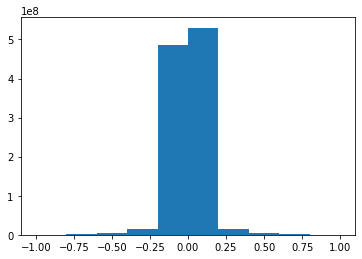

In [18]:
trainset = np.concatenate(train_data[0])
print(f"Mean: {trainset.mean()}, Std: {trainset.std()}")
plt.hist(trainset)

Mean: -6.107000808697194e-05, Std: 0.0815630555152893


(array([5.9510000e+04, 1.3454200e+05, 3.7369000e+05, 1.2881920e+06,
        5.0615095e+07, 5.6880637e+07, 1.3104280e+06, 3.5650500e+05,
        1.1257600e+05, 5.5597000e+04]),
 array([-1.0000000e+00, -8.0000305e-01, -6.0000610e-01, -4.0000916e-01,
        -2.0001221e-01, -1.5258789e-05,  1.9998169e-01,  3.9997864e-01,
         5.9997559e-01,  7.9997253e-01,  9.9996948e-01], dtype=float32),
 <BarContainer object of 10 artists>)

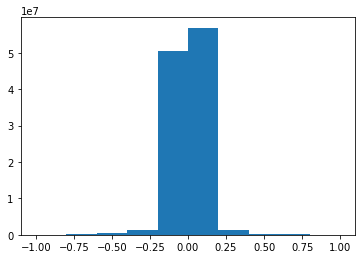

In [19]:
valset = np.concatenate(val_data[0])
print(f"Mean: {valset.mean()}, Std: {valset.std()}")
plt.hist(valset)

Mean: -0.0002670137910172343, Std: 0.08992961049079895


(array([   77459.,   177336.,   457745.,  1540015., 51994972., 55480911.,
         1545980.,   434619.,   159939.,    69747.]),
 array([-1.0000000e+00, -8.0000305e-01, -6.0000610e-01, -4.0000916e-01,
        -2.0001221e-01, -1.5258789e-05,  1.9998169e-01,  3.9997864e-01,
         5.9997559e-01,  7.9997253e-01,  9.9996948e-01], dtype=float32),
 <BarContainer object of 10 artists>)

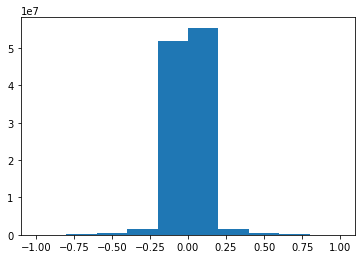

In [20]:
testset = np.concatenate(test_data[0])
print(f"Mean: {testset.mean()}, Std: {testset.std()}")
plt.hist(testset)

Mean: -7.156041647249367e-06, Std: 0.07524599134922028


(array([9.630000e+02, 1.903000e+03, 6.411000e+03, 2.606800e+04,
        1.084940e+06, 1.242492e+06, 2.752700e+04, 7.170000e+03,
        1.763000e+03, 7.630000e+02]),
 array([-1.0000000e+00, -8.0000305e-01, -6.0000610e-01, -4.0000916e-01,
        -2.0001221e-01, -1.5258789e-05,  1.9998169e-01,  3.9997864e-01,
         5.9997559e-01,  7.9997253e-01,  9.9996948e-01], dtype=float32),
 <BarContainer object of 10 artists>)

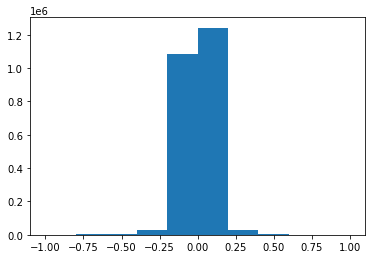

In [21]:
predictset = np.concatenate(predict_data)
print(f"Mean: {predictset.mean()}, Std: {predictset.std()}")
plt.hist(predictset)